**Basic foundational model for toxicity detection**

In [3]:
!pip install --quiet deepchem lightgbm

import deepchem as dc
import numpy as np
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# Loading Tox21 dataset with ECFP fingerprint featurizer,
#later I'll use geometrical or graphical model for detecting structures of molecules
#because, that's how our body actually works
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP', split='random')
train_dataset, valid_dataset, test_dataset = datasets

# Helper function: train and evaluate one model per task
def train_and_eval_model(model_type='random_forest'):
    test_scores = {}
    valid_scores = {}

    for task_index, task in enumerate(tqdm(tasks, desc=f"Training {model_type}")):
        # Prepare data
        y_train = train_dataset.y[:, task_index]
        y_valid = valid_dataset.y[:, task_index]
        y_test = test_dataset.y[:, task_index]

        w_train = train_dataset.w[:, task_index]
        w_valid = valid_dataset.w[:, task_index]
        w_test = test_dataset.w[:, task_index]

        # Filter out missing labels
        train_mask = w_train != 0
        valid_mask = w_valid != 0
        test_mask = w_test != 0

        if not train_mask.any() or not valid_mask.any() or not test_mask.any():
            print(f"Skipping {task} due to empty data.")
            continue

        X_train = train_dataset.X[train_mask]
        y_train = y_train[train_mask]

        X_valid = valid_dataset.X[valid_mask]
        y_valid = y_valid[valid_mask]

        X_test = test_dataset.X[test_mask]
        y_test = y_test[test_mask]

        # Select model
        if model_type == 'random_forest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif model_type == 'lightgbm':
            model = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
        else:
            raise ValueError("Unsupported model type")

        # Train and evaluate
        model.fit(X_train, y_train)
        y_valid_pred = model.predict_proba(X_valid)[:, 1]
        y_test_pred = model.predict_proba(X_test)[:, 1]

        try:
            valid_auc = roc_auc_score(y_valid, y_valid_pred)
            test_auc = roc_auc_score(y_test, y_test_pred)
            valid_scores[task] = valid_auc
            test_scores[task] = test_auc
        except ValueError:
            print(f"Skipping {task} (could not compute ROC AUC)")

    return valid_scores, test_scores

#Train both models
valid_scores_rf, test_scores_rf = train_and_eval_model('random_forest')
valid_scores_lgbm, test_scores_lgbm = train_and_eval_model('lightgbm')

# Show average AUCs
print("\nRandomForest Avg Test AUC:", np.nanmean(list(test_scores_rf.values())))
print("LightGBM Avg Test AUC:     ", np.nanmean(list(test_scores_lgbm.values())))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 19.4 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:18:50] DEPRECATION WARNING: please use MorganGenerator
[08:1

[LightGBM] [Info] Number of positive: 247, number of negative: 5560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 5807, number of used features: 1015
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042535 -> initscore=-3.113965
[LightGBM] [Info] Start training from score -3.113965


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:   8%|▊         | 1/12 [00:00<00:09,  1.22it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 183, number of negative: 5204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 5387, number of used features: 1010
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033971 -> initscore=-3.347697
[LightGBM] [Info] Start training from score -3.347697


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  17%|█▋        | 2/12 [00:01<00:07,  1.32it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 607, number of negative: 4616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 5223, number of used features: 1010
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116217 -> initscore=-2.028755
[LightGBM] [Info] Start training from score -2.028755


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  25%|██▌       | 3/12 [00:02<00:06,  1.39it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 242, number of negative: 4384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 4626, number of used features: 995
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.052313 -> initscore=-2.896779
[LightGBM] [Info] Start training from score -2.896779


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  33%|███▎      | 4/12 [00:02<00:05,  1.42it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 622, number of negative: 4317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2006
[LightGBM] [Info] Number of data points in the train set: 4939, number of used features: 1003
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.125936 -> initscore=-1.937376
[LightGBM] [Info] Start training from score -1.937376


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  42%|████▏     | 5/12 [00:03<00:05,  1.20it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 272, number of negative: 5285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 5557, number of used features: 1014
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048947 -> initscore=-2.966826
[LightGBM] [Info] Start training from score -2.966826


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  50%|█████     | 6/12 [00:05<00:05,  1.06it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 147, number of negative: 5005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2014
[LightGBM] [Info] Number of data points in the train set: 5152, number of used features: 1007
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028533 -> initscore=-3.527760
[LightGBM] [Info] Start training from score -3.527760


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  58%|█████▊    | 7/12 [00:05<00:04,  1.13it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 744, number of negative: 3888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1950
[LightGBM] [Info] Number of data points in the train set: 4632, number of used features: 975
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160622 -> initscore=-1.653609
[LightGBM] [Info] Start training from score -1.653609


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  67%|██████▋   | 8/12 [00:06<00:03,  1.24it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 212, number of negative: 5439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 5651, number of used features: 1014
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037515 -> initscore=-3.244764
[LightGBM] [Info] Start training from score -3.244764


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  75%|███████▌  | 9/12 [00:07<00:02,  1.28it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 306, number of negative: 4864
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2000
[LightGBM] [Info] Number of data points in the train set: 5170, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059188 -> initscore=-2.766031
[LightGBM] [Info] Start training from score -2.766031


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  83%|████████▎ | 10/12 [00:07<00:01,  1.32it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 750, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1998
[LightGBM] [Info] Number of data points in the train set: 4634, number of used features: 999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161847 -> initscore=-1.644548
[LightGBM] [Info] Start training from score -1.644548


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm:  92%|█████████▏| 11/12 [00:08<00:00,  1.39it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 341, number of negative: 5073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 1012
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.062985 -> initscore=-2.699805
[LightGBM] [Info] Start training from score -2.699805


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training lightgbm: 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]


RandomForest Avg Test AUC: 0.8336317256940112
LightGBM Avg Test AUC:      0.8389718272217664


***Visualizing per task scores***

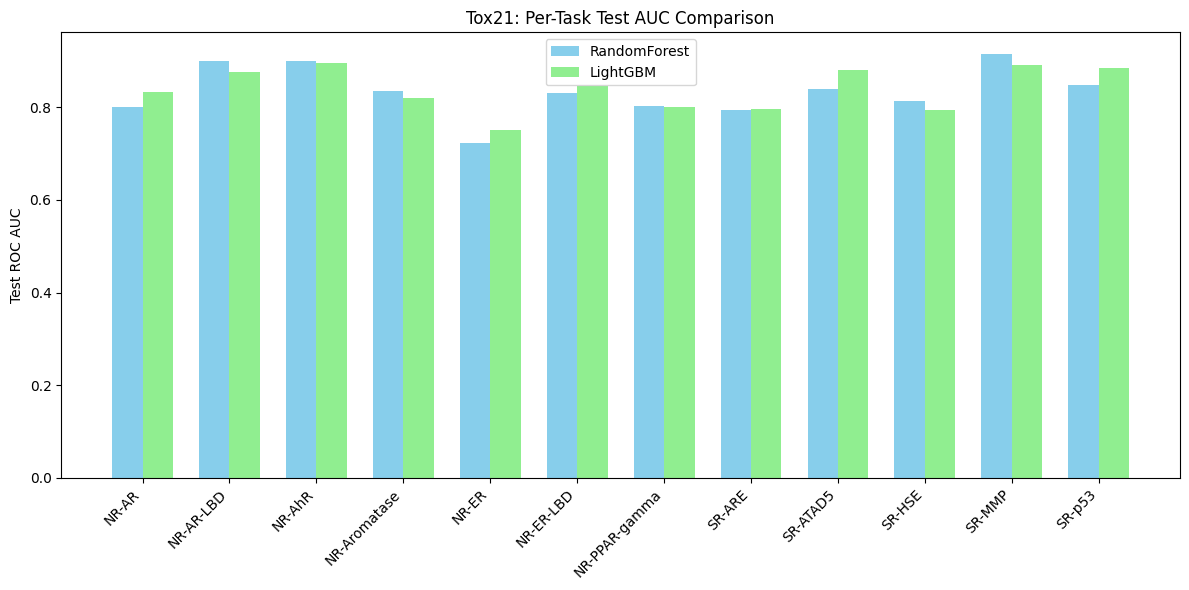

In [5]:
import matplotlib.pyplot as plt

tasks_sorted = sorted(test_scores_rf.keys())

rf_aucs = [test_scores_rf[task] for task in tasks_sorted]
lgbm_aucs = [test_scores_lgbm[task] for task in tasks_sorted]

x = np.arange(len(tasks_sorted))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rf_aucs, width, label='RandomForest', color='skyblue')
plt.bar(x + width/2, lgbm_aucs, width, label='LightGBM', color='lightgreen')

plt.xticks(x, tasks_sorted, rotation=45, ha='right')
plt.ylabel("Test ROC AUC")
plt.title("Tox21: Per-Task Test AUC Comparison")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
model = LGBMClassifier().fit(X_train, y_train)
importances = model.feature_importances_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 341, number of negative: 5073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 1012
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.062985 -> initscore=-2.699805
[LightGBM] [Info] Start training from score -2.699805


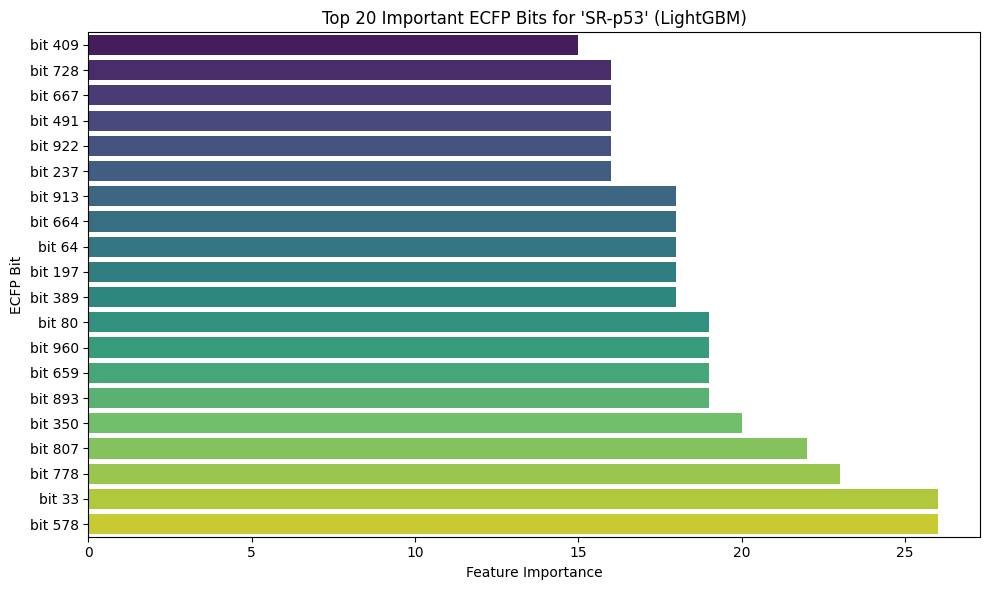

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
task_name = 'SR-p53'  # Or any other task you trained on

# Already extracted above:
# importances = model.feature_importances_

# Show top 20 most important features
top_n = 20
indices = np.argsort(importances)[-top_n:]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[f'bit {i}' for i in indices], hue=[f'bit {i}' for i in indices], dodge=False, palette='viridis', legend=False)
plt.xlabel("Feature Importance")
plt.ylabel("ECFP Bit")
plt.title(f"Top {top_n} Important ECFP Bits for '{task_name}' (LightGBM)")
plt.tight_layout()
plt.show()

In [12]:
import deepchem as dc
import numpy as np
from sklearn.metrics import roc_auc_score

# again using Tox21 dataset with featurization (ECFP)
tox21_tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP', splitter='random')
train_dataset, valid_dataset, test_dataset = datasets

model = dc.models.MultitaskClassifier(
    n_tasks=len(tox21_tasks),
    n_features=1024,
    layer_sizes=[1000],
    dropouts=[0.25],
    learning_rate=0.001,
    batch_size=64,
    model_dir='multitask_model'
)

# Train the model
model.fit(train_dataset, nb_epoch=30)

# Evaluate performance
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)

valid_scores = model.evaluate(valid_dataset, [metric], transformers)
test_scores = model.evaluate(test_dataset, [metric], transformers)

print("Validation ROC-AUC (avg):", valid_scores['mean-roc_auc_score'])
print("Test ROC-AUC (avg):", test_scores['mean-roc_auc_score'])

Validation ROC-AUC (avg): 0.74695795073724
Test ROC-AUC (avg): 0.7985665535191092


Per-task score keys: dict_keys(['mean-roc_auc_score'])
Per-task score values: {'mean-roc_auc_score': [np.float64(0.8123505976095617), np.float64(0.8693116423196103), np.float64(0.7914257137661393), np.float64(0.8078409402725693), np.float64(0.6880748007357449), np.float64(0.8538319946452477), np.float64(0.7111730013106159), np.float64(0.7084553440702783), np.float64(0.8785692510923686), np.float64(0.7910940076965366), np.float64(0.8304432013769363), np.float64(0.8402281473336999)]}


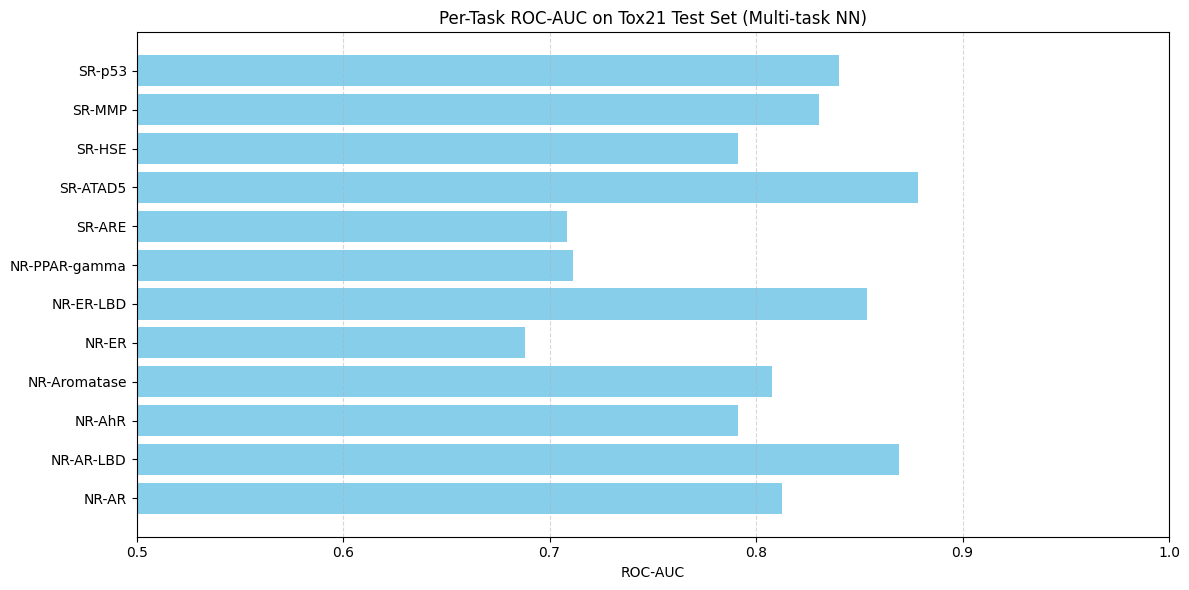

In [18]:
from deepchem.metrics import Metric, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

metric = Metric(roc_auc_score, np.mean, mode="classification")
overall_score, per_task_scores = model.evaluate(
    test_dataset, [metric], transformers, per_task_metrics=True
)

print("Per-task score keys:", per_task_scores.keys())
print("Per-task score values:", per_task_scores)

# Check if it's a list or dict
if isinstance(per_task_scores, dict):
    task_aucs = list(per_task_scores.values())[0]
else:
    task_aucs = per_task_scores  # it's likely already a list of AUCs

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(tox21_tasks, task_aucs, color='skyblue')
plt.xlabel("ROC-AUC")
plt.title("Per-Task ROC-AUC on Tox21 Test Set (Multi-task NN)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()